# # Loading Packages

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import re

%matplotlib inline

# # Functions

In [3]:
#Remove leading zeros due to website data format
def removeLeadingZeros(str):
 
    # Regex to remove leading
    # zeros from a string
    regex = "^0+(?!$)"
 
    # Replaces the matched
    # value with given string
    str = re.sub(regex, "", str)
    return str


#function to convert strings of min and seconds to seconds
#  e.g. 1:06.32 becomes 66.32

def secondsConversion(x):
    if x == '': #empty string because it used to be a string
        return 0
    elif ':' in x:
        mins, secs = map(float, re.split(':|,\.', x))
        td = timedelta(minutes=mins, seconds=secs)
        return td.total_seconds()

    else: return float(x)
    
    
    
#function to convert ft and inches to inches
#  19-0.5 to 228.5

def feetConversion(x):
    feet, inches = map(float, re.split('-', x))
    inches = inches/12
    finalFeet = feet + inches
    return finalFeet

# # Loading the Data Files

In [4]:
#femaleDF = pd.read_csv(r'outdoorF200.csv'.format(eventName = event), encoding= 'unicode_escape')
#maleDF = pd.read_csv(r'outdoorM100.csv'.format(eventName = event), encoding= 'unicode_escape')


#femaleDF['TIME'] = femaleDF['TIME'].apply(lambda x: removeLeadingZeros(x))
#femaleDF['TIME'].dtypes


In [5]:
genderList = ['M', 'F']
eventList = ['100','200','100mH','200','300mH','400','800','1600','3200','Discus','HighJump',
        'Javelin','LongJump','ShotPut','TripleJump']


femaleStateRecords = {'100':11.25, '200': 22.95, '100mH':12.95, 
                      '400': 52.82, '300mH':41.10,
                     '800': 120.07, '1600':277.07, '3200':594.75,
                     '300mH':41.10, 'Discus':feetConversion('169-2') , 
                      'HighJump':feetConversion('6-1'),
                     'Javelin':feetConversion('185-8'), 'LongJump':feetConversion('20-8.5'),
                      'ShotPut':feetConversion('53-0.25'),'TripleJump':feetConversion('42-3.75')}



TIME 100


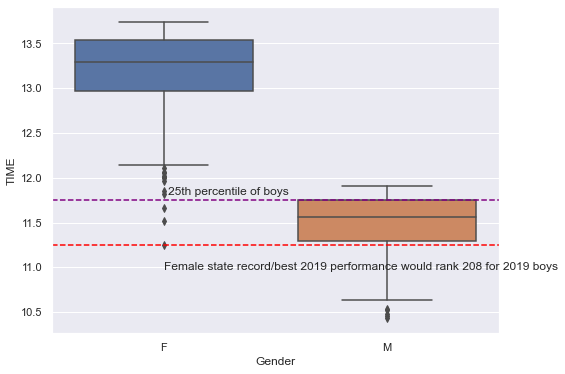

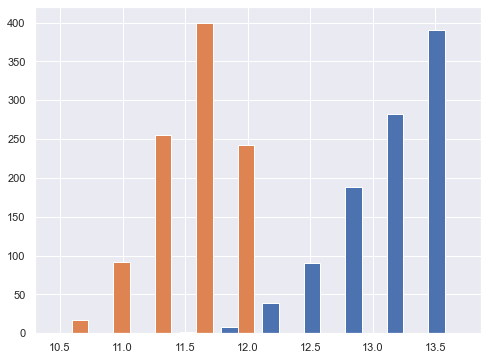

TIME 200


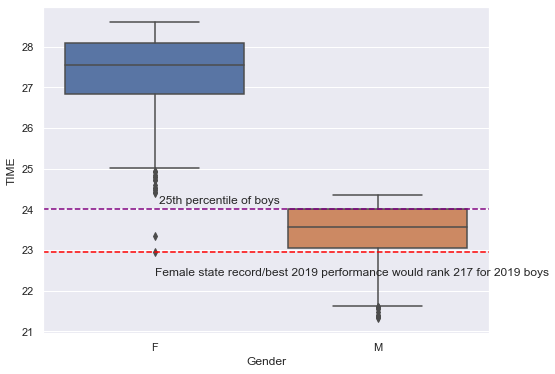

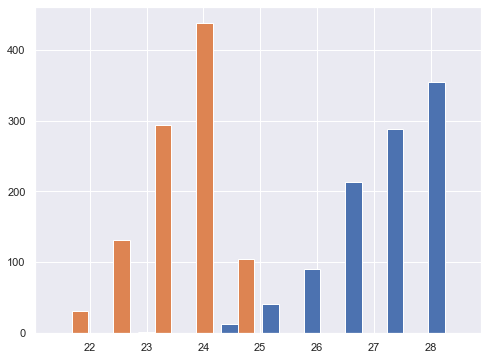

TIME 100mH


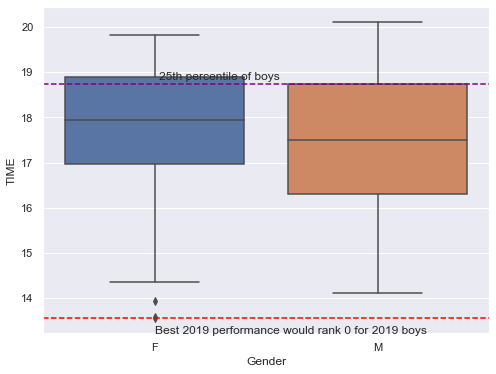

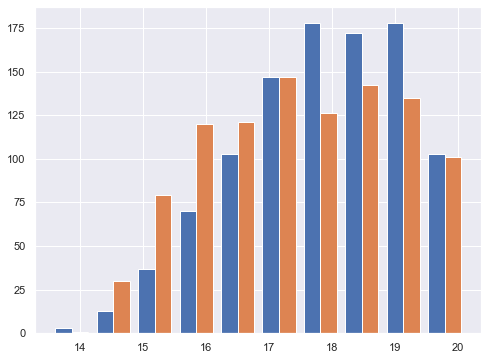

TIME 200


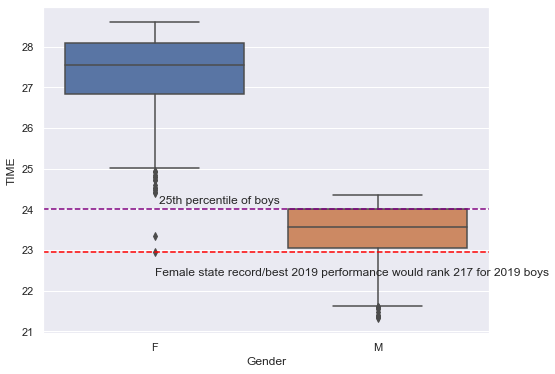

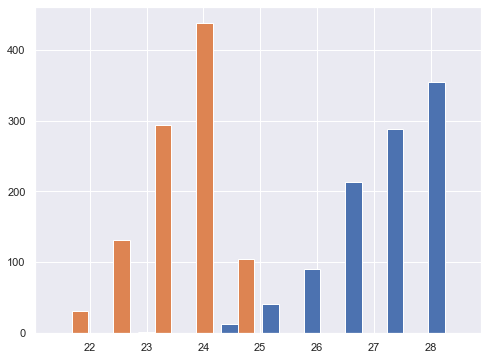

TIME 300mH


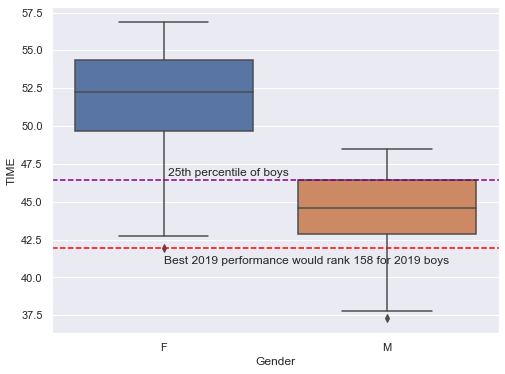

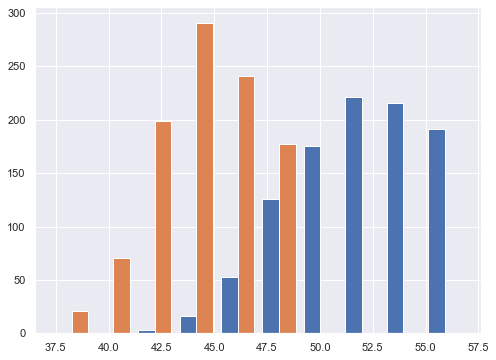

TIME 400


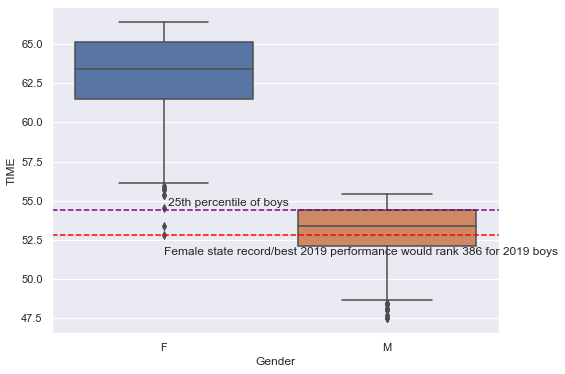

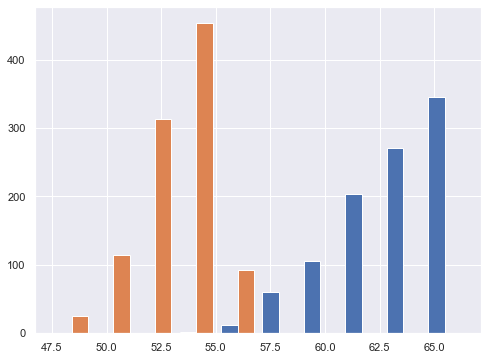

TIME 800


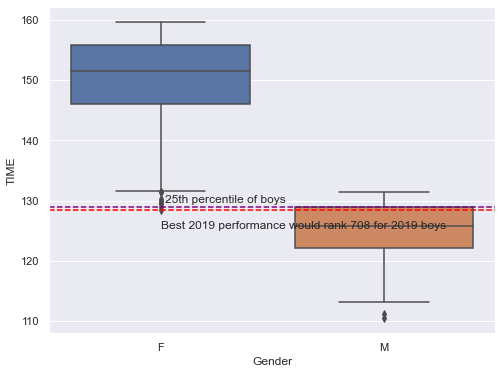

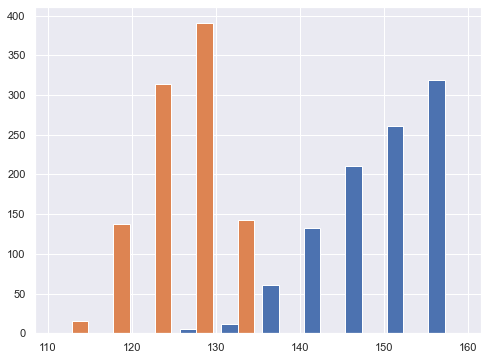

TIME 1600


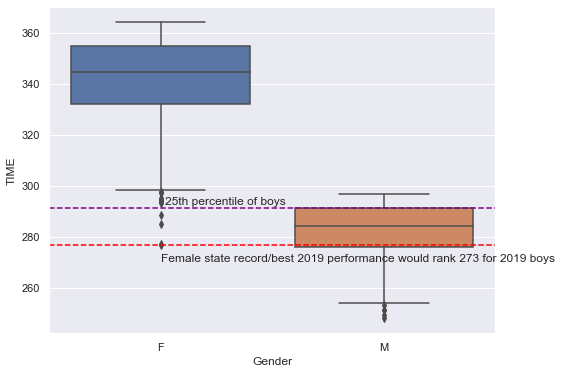

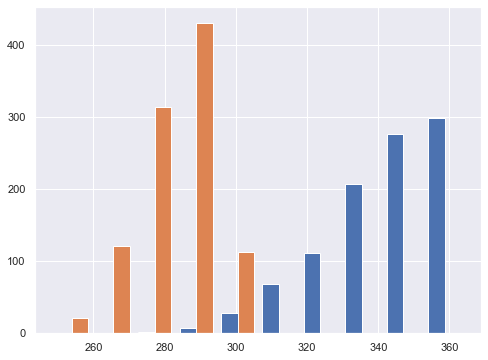

TIME 3200


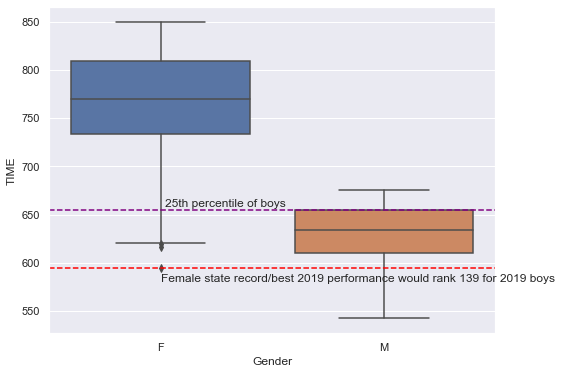

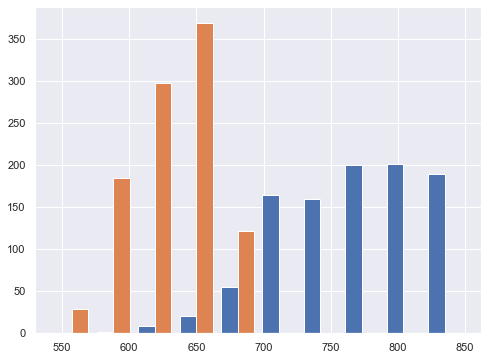

MARK Discus


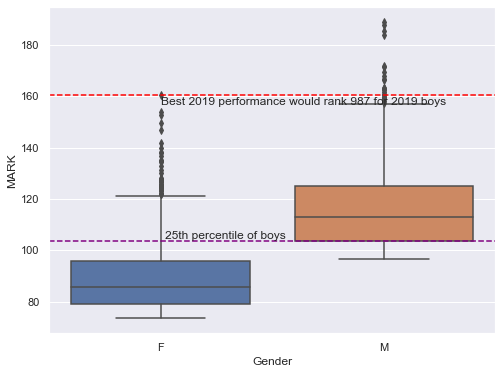

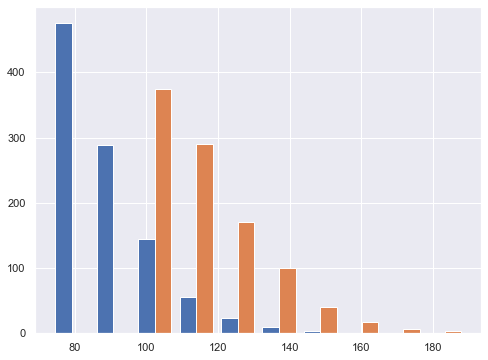

MARK HighJump


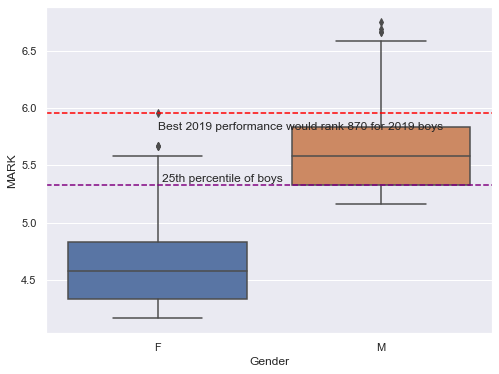

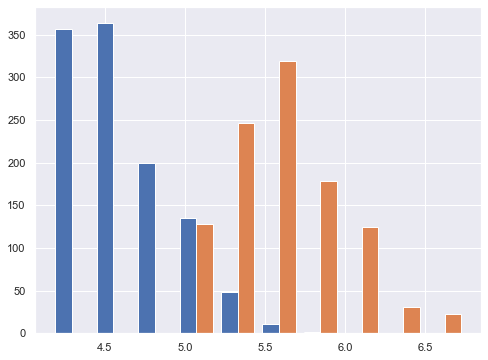

MARK Javelin


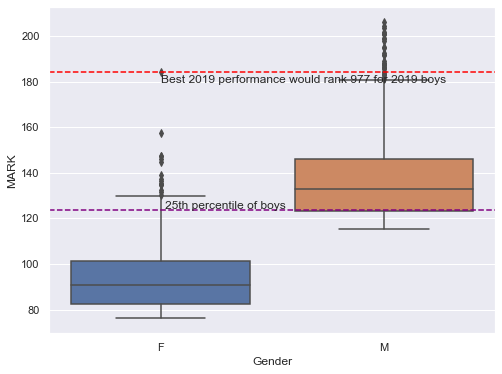

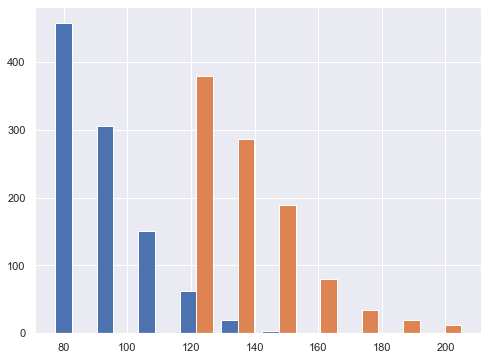

MARK LongJump


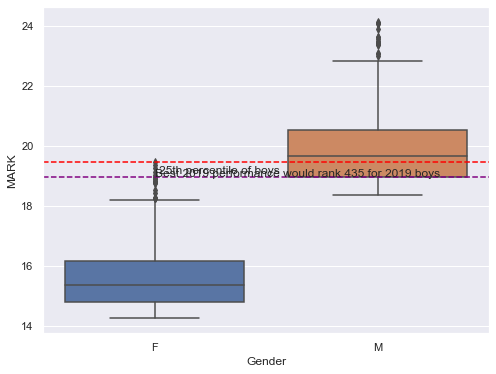

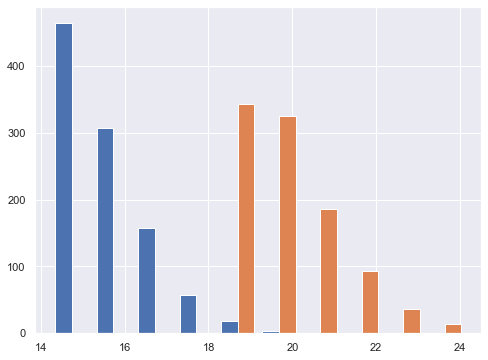

MARK ShotPut


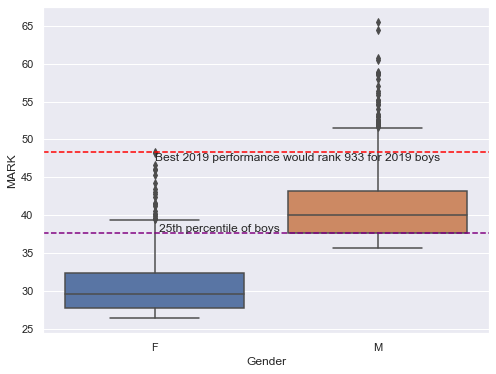

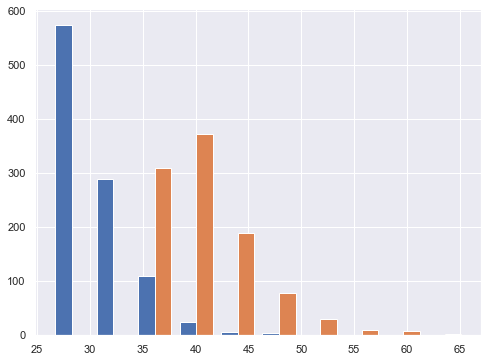

MARK TripleJump


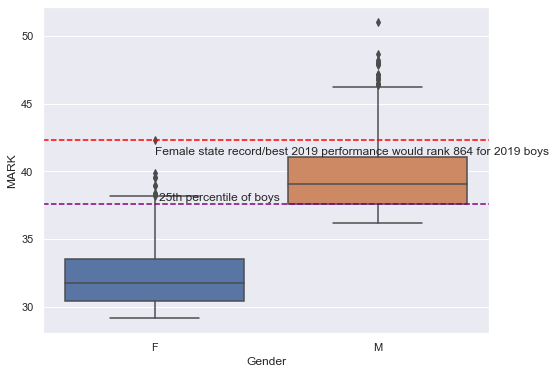

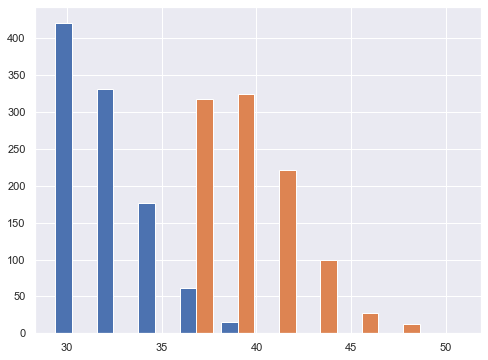

In [10]:
for event in eventList:
    femaleDF = pd.read_csv(r'outdoorF{eventName}.csv'.format(eventName = event), encoding= 'unicode_escape')
    maleDF = pd.read_csv(r'outdoorM{eventName}.csv'.format(eventName = event), encoding= 'unicode_escape')
    print(femaleDF.columns[1], event)
    
    if femaleDF.columns[1] == 'TIME':
        analysisColumn = 'TIME'
    else:
        analysisColumn = 'MARK'
    
    dfList = [femaleDF , maleDF]
    
    for df in dfList:
        df[analysisColumn] = df[analysisColumn].astype({analysisColumn: 'str'})
        df[analysisColumn] = df[analysisColumn].apply(lambda x: removeLeadingZeros(x))
        df[analysisColumn] = df[analysisColumn].apply(lambda x: x.lower())
        df[analysisColumn] = df[analysisColumn].replace(to_replace ='\s|[a-z]', value = '', regex = True)
        
        if analysisColumn == 'TIME':
            df[analysisColumn] = df[analysisColumn].apply(lambda x: secondsConversion(x))
        else:
            df[analysisColumn] = df[analysisColumn].dropna()
            df[analysisColumn] = df[analysisColumn].replace('', '0-0')
            df[analysisColumn] = df[analysisColumn].apply(lambda x: feetConversion(x))
            
        df[analysisColumn] = df[analysisColumn][df[analysisColumn] != 0]
    
    
    femaleDF['Gender'] = 'F'
    maleDF['Gender'] = 'M'
    
    finalDF = pd.concat([femaleDF[[analysisColumn, 'Gender']], maleDF[[analysisColumn, 'Gender']]])
    
    sns.set(rc={'figure.figsize':(8,6)})
    
    ax = sns.boxplot(x="Gender", y=analysisColumn, data=finalDF)
    
    bestFemalePerformance2019 = femaleDF[analysisColumn][0]
    maleTop75Performance2019 = maleDF[analysisColumn][751]
    
    bestFemaleRankingInBoys2019 = maleDF[analysisColumn][maleDF[analysisColumn] < bestFemalePerformance2019]
    bestFemaleRankingInBoys2019 = bestFemaleRankingInBoys2019.shape[0]
    
    textPosition1 = bestFemalePerformance2019-0.025*bestFemalePerformance2019 #set good text position for the writing
    ax.axhline(bestFemalePerformance2019, ls='--', color = "red")
    
    if bestFemalePerformance2019 == femaleStateRecords[event]:
        ax.text(0.0001, textPosition1, 
                "Female state record/best 2019 performance would rank " + str(bestFemaleRankingInBoys2019) + " for 2019 boys")
        
    else:
        ax.text(0.0001, textPosition1, 
                "Best 2019 performance would rank " + str(bestFemaleRankingInBoys2019) + " for 2019 boys")
    
    
    textPosition2 = maleTop75Performance2019 + 0.005 * maleTop75Performance2019 
    ax.axhline(maleTop75Performance2019, ls='--', color = 'purple')
    ax.text(0.02, textPosition2, "25th percentile of boys") 
    plt.show()
    
    plt.hist([femaleDF[analysisColumn] , maleDF[analysisColumn]])
     
    plt.show()
    #need fractions, PA state records
   

# # Perform Normalization

In [7]:
'''
#make sure TIME column is stripped of all letter characters and whitespace
df['TIME'] = df['TIME'].apply(lambda x: removeLeadingZeros(x))
df['TIME'] = df['TIME'].apply(lambda x: x.lower())
df['TIME'] = df['TIME'].replace(to_replace ='\s|[a-z]', value = '', regex = True)
'''



"\n#make sure TIME column is stripped of all letter characters and whitespace\ndf['TIME'] = df['TIME'].apply(lambda x: removeLeadingZeros(x))\ndf['TIME'] = df['TIME'].apply(lambda x: x.lower())\ndf['TIME'] = df['TIME'].replace(to_replace ='\\s|[a-z]', value = '', regex = True)\n"

In [8]:
'''
df['TIME'] = df['TIME'].apply(lambda x: secondsConversion(x))
df['TIME'] = df['TIME'][df['TIME'] != 0]
'''

"\ndf['TIME'] = df['TIME'].apply(lambda x: secondsConversion(x))\ndf['TIME'] = df['TIME'][df['TIME'] != 0]\n"

In [9]:
'''#df['TIME'] = df['TIME'].astype(float)
sns.displot(df['TIME'])'''

"#df['TIME'] = df['TIME'].astype(float)\nsns.displot(df['TIME'])"